## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [83]:
# Start solution here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [84]:
data = pd.read_csv('student.csv')
pd.set_option('display.max_columns', None)
frame = pd.DataFrame(data)
print(frame)

     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      reason guardian  traveltime  stud

In [85]:
frame[frame.isnull().any(axis=1)]
# No missing values.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Total Grade


In [86]:
# drop all unnecessary varaibels
frame = frame.drop(['school', 'address', 'Mjob', 'Fjob', 'famsize', 'reason', 'guardian', 'traveltime', 'failures', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'romantic', 'goout', 'famsup', 'G1', 'G2', 'G3'], axis=1)
print(frame)

     sex  age Pstatus  Medu  Fedu  studytime internet  famrel  freetime  Dalc  \
0      F   18       A     4     4          2       no       4         3     1   
1      F   17       T     1     1          2      yes       5         3     1   
2      F   15       T     1     1          2      yes       4         3     2   
3      F   15       T     4     2          3      yes       3         2     1   
4      F   16       T     3     3          2       no       4         3     1   
...   ..  ...     ...   ...   ...        ...      ...     ...       ...   ...   
1039   F   19       T     2     3          3      yes       5         4     1   
1040   F   18       T     3     1          2      yes       4         3     1   
1041   F   18       T     1     1          2       no       1         1     1   
1042   M   17       T     3     1          1      yes       2         4     3   
1043   M   18       T     3     2          1      yes       4         4     3   

      Walc  health  absence

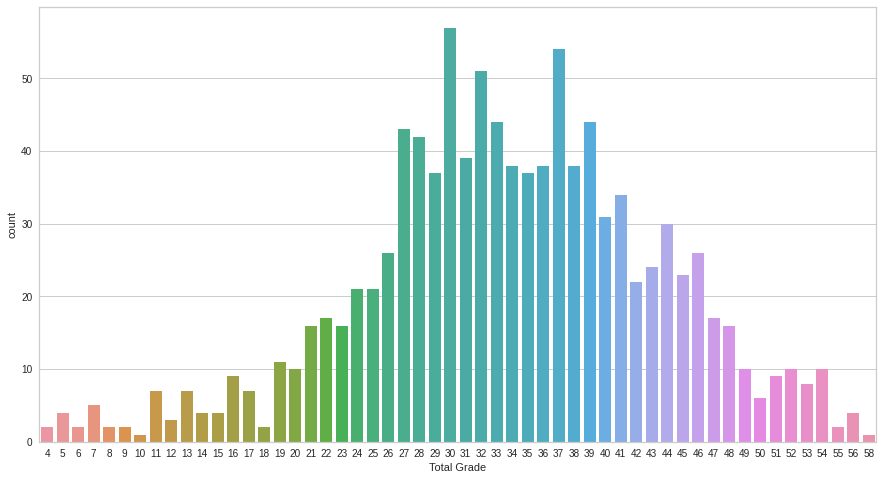

In [87]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x="Total Grade", data=frame)

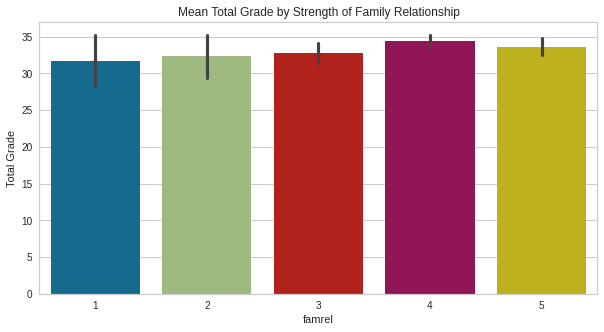

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x="famrel", y="Total Grade", data=frame)
plt.title('Mean Total Grade by Strength of Family Relationship')
plt.show()

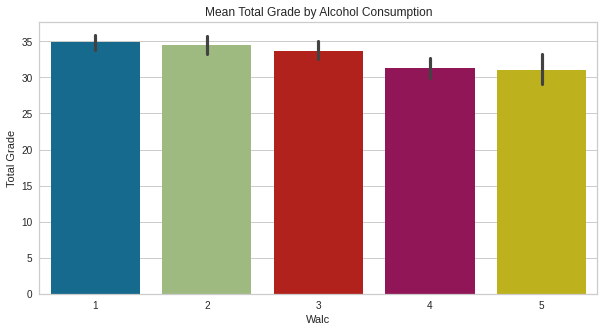

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(x="Walc", y="Total Grade", data=frame)
plt.title('Mean Total Grade by Alcohol Consumption')
plt.show()

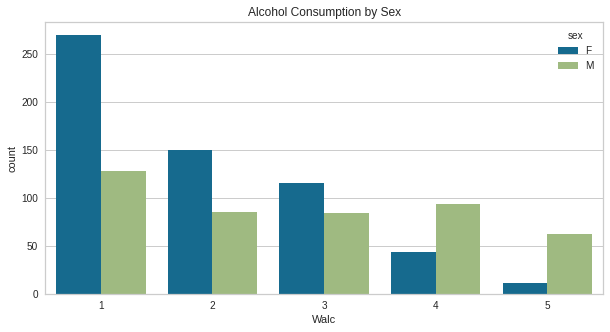

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(x="Walc", hue="sex", data=frame)
plt.title('Alcohol Consumption by Sex')
plt.show()

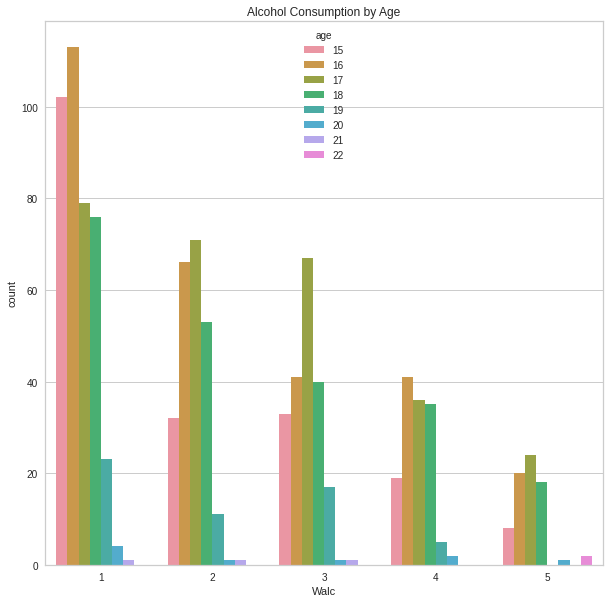

In [91]:
plt.figure(figsize=(10,10))
sns.countplot(x="Walc", hue="age", data=frame)
plt.title('Alcohol Consumption by Age')
plt.show()

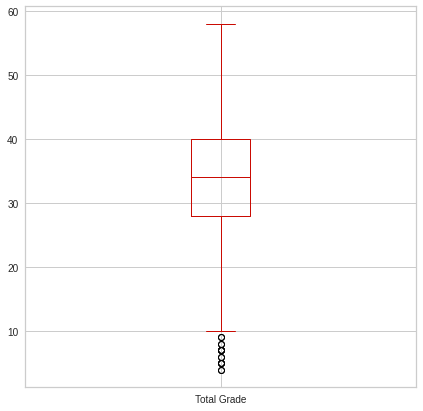

In [92]:
freq = frame.boxplot('Total Grade', figsize=(7,7), color = 'R')

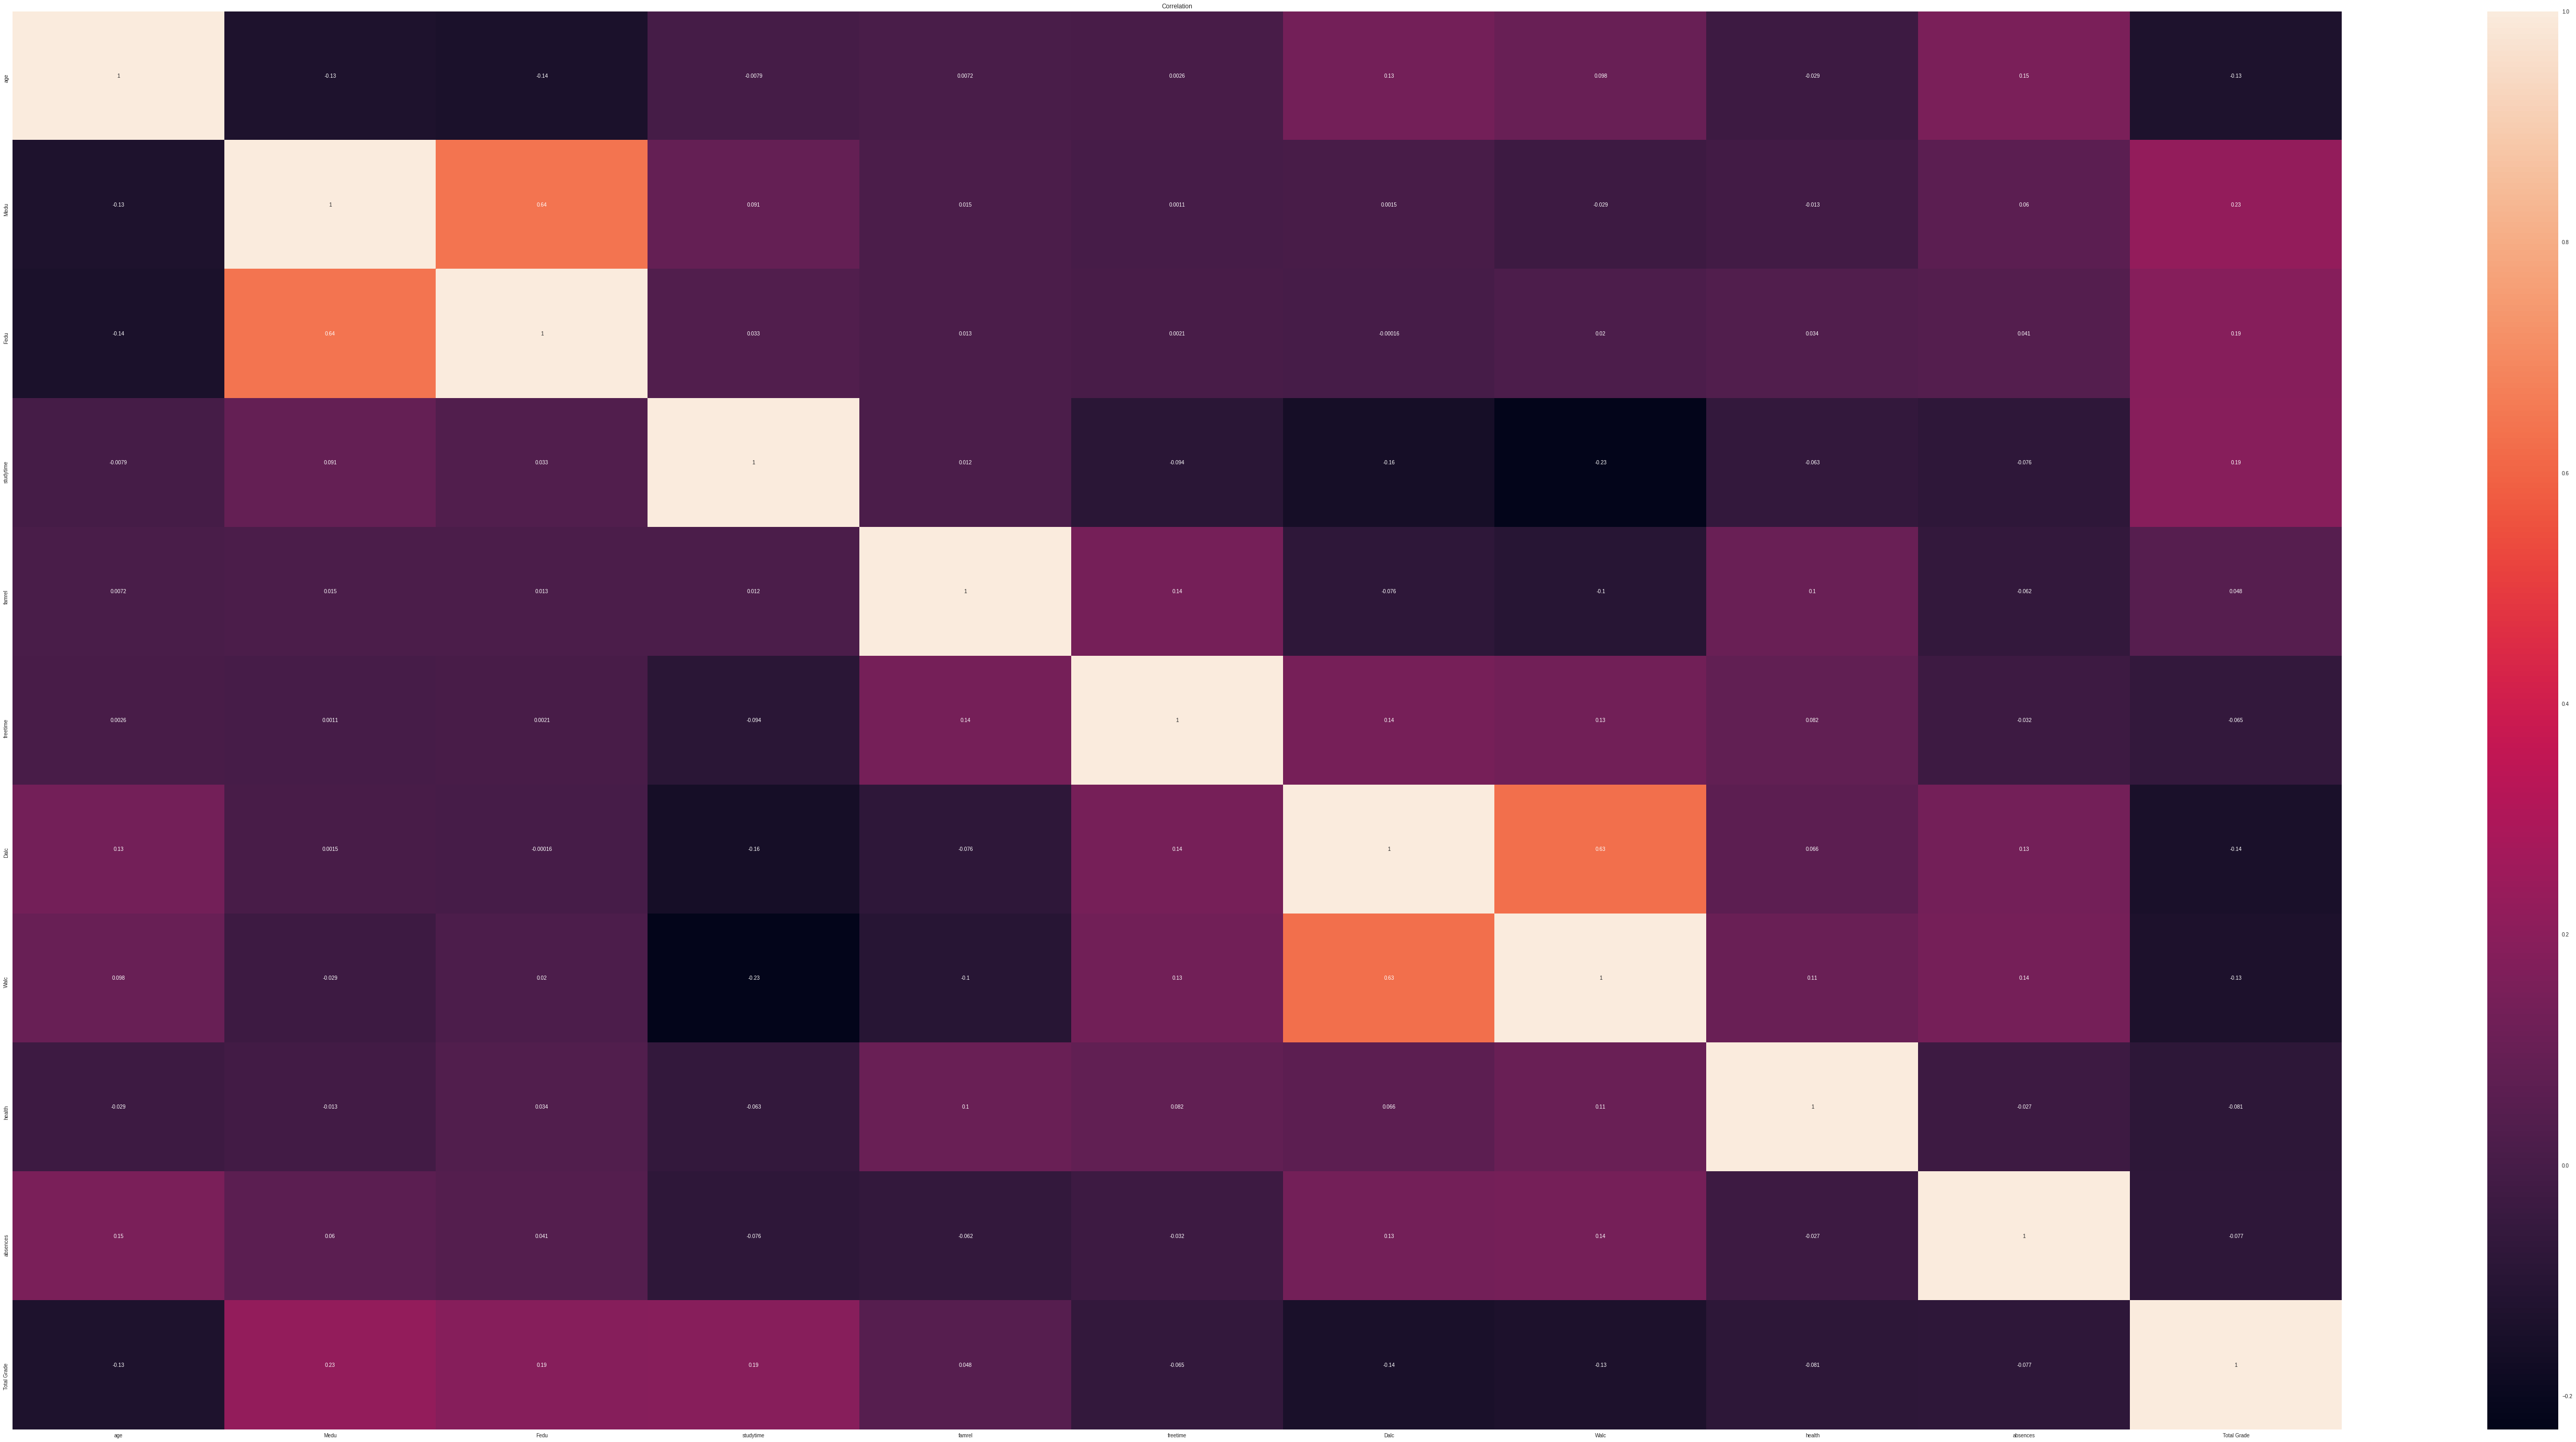

In [93]:
plt.title('Correlation')
sns.heatmap(frame.corr(),annot = True,cbar = True)
plt.show()

In [94]:
# Convert all categorical feature variables into dummy variables.
sex = pd.get_dummies(frame["sex"],drop_first=True)
pstatus = pd.get_dummies(frame["Pstatus"],drop_first=True)
internet = pd.get_dummies(frame["internet"],drop_first=True)
frame.loc[frame['Total Grade'] >= 36, 'Grade'] = 1
frame.loc[frame['Total Grade'] < 36, 'Grade'] = 0
frame = pd.concat([ sex,pstatus,internet,frame],axis=1)
frame = frame = frame.drop(['sex', 'Pstatus', 'internet', 'Total Grade'], axis=1)
print(frame)

      M  T  yes  age  Medu  Fedu  studytime  famrel  freetime  Dalc  Walc  \
0     0  0    0   18     4     4          2       4         3     1     1   
1     0  1    1   17     1     1          2       5         3     1     1   
2     0  1    1   15     1     1          2       4         3     2     3   
3     0  1    1   15     4     2          3       3         2     1     1   
4     0  1    0   16     3     3          2       4         3     1     2   
...  .. ..  ...  ...   ...   ...        ...     ...       ...   ...   ...   
1039  0  1    1   19     2     3          3       5         4     1     2   
1040  0  1    1   18     3     1          2       4         3     1     1   
1041  0  1    0   18     1     1          2       1         1     1     1   
1042  1  1    1   17     3     1          1       2         4     3     4   
1043  1  1    1   18     3     2          1       4         4     3     4   

      health  absences  Grade  
0          3         6    0.0  
1          

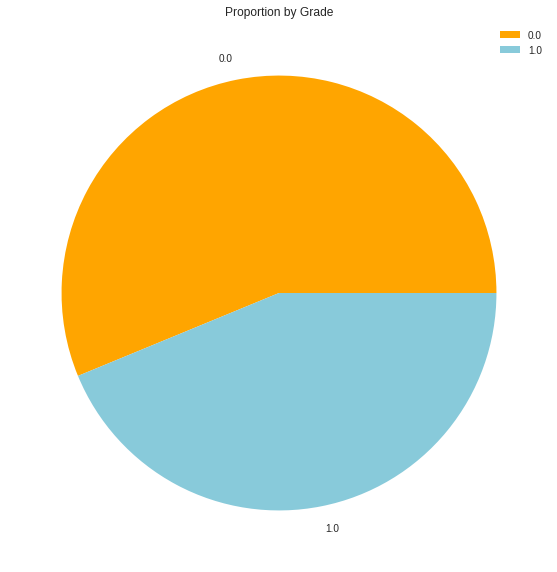

In [95]:
freq = frame['Grade'].value_counts().plot.pie(figsize=(20,10),title = 'Proportion by Grade', colors = ['orange','c'])
freq.set_ylabel('')
freq.legend()

In [96]:
# Convert the DataFrame object into NumPy array and normalize the data
values = frame.values
# Now impute it
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputedData = imputer.fit_transform(values)
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)
cols = ['Gender','Pstatus','Internet','age', 'Medu', 'Fedu', 'studytime','famrel','freetime','Dalc','Walc','health','absences','Grade']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

   Gender  Pstatus  Internet       age  Medu  Fedu  studytime  famrel  \
0     0.0      0.0       0.0  0.428571  1.00  1.00   0.333333    0.75   
1     0.0      1.0       1.0  0.285714  0.25  0.25   0.333333    1.00   
2     0.0      1.0       1.0  0.000000  0.25  0.25   0.333333    0.75   
3     0.0      1.0       1.0  0.000000  1.00  0.50   0.666667    0.50   
4     0.0      1.0       0.0  0.142857  0.75  0.75   0.333333    0.75   

   freetime  Dalc  Walc  health  absences  Grade  
0      0.50  0.00  0.00     0.5  0.080000    0.0  
1      0.50  0.00  0.00     0.5  0.053333    0.0  
2      0.50  0.25  0.50     0.5  0.133333    0.0  
3      0.25  0.00  0.00     1.0  0.026667    1.0  
4      0.50  0.00  0.25     1.0  0.053333    0.0  


In [97]:
# Partition the data into training and test sets (70/30)
X = normalizedData.drop("Grade",axis=1)
y = normalizedData["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Baseline classification
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5828025477707006


In [98]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, predict_rf)

print(' Accuracy = ', acc_rf)

 Accuracy =  0.6146496815286624


In [99]:
# AdaBoost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
predict_boost = ada_boost.predict(X_test)
acc_boost = accuracy_score(y_test, predict_boost)

print(' Accuracy = ', acc_boost)

 Accuracy =  0.6146496815286624


In [100]:
# logistic regression model
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
predit = logistic.predict(X_test)
print(classification_report(y_test, predit))

              precision    recall  f1-score   support

         0.0       0.65      0.70      0.68       183
         1.0       0.54      0.48      0.51       131

    accuracy                           0.61       314
   macro avg       0.60      0.59      0.59       314
weighted avg       0.61      0.61      0.61       314



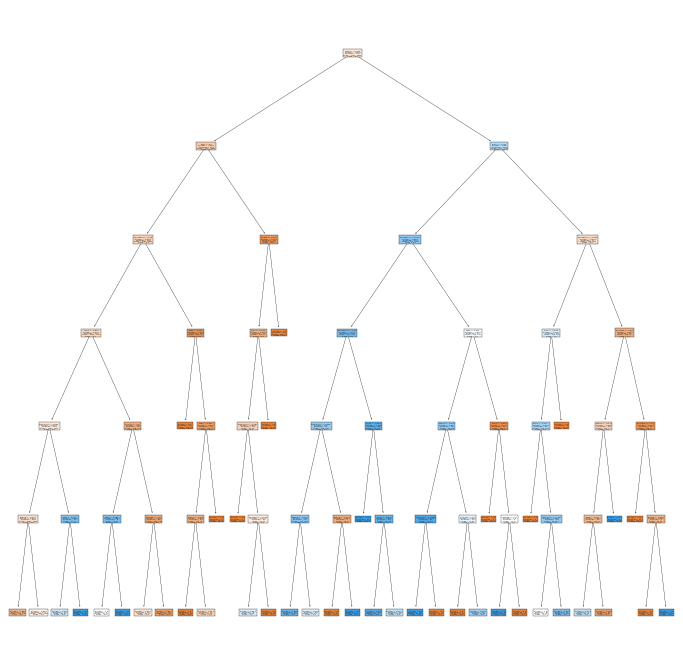

In [106]:
# Decision Tree:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020)
dt.fit(X_train,y_train)
ypred = dt.predict((X_test))
plt.show()
fn = X.columns
plt.figure(figsize=(12,12))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

In [107]:
# Voting Model (This is the one I choose)
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rfClf = RandomForestClassifier(n_estimators=200, random_state=0)
dtClf =  DecisionTreeClassifier (max_depth =4)
svmClf = SVC(probability=True, random_state=0)
logClf = LogisticRegression(random_state=0)

clf = VotingClassifier(estimators = [('rf',rfClf), ('dt',dtClf), ('svm',svmClf), ('log', logClf)], voting='soft')
model = clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
acc_clf = accuracy_score(y_test, clf_pred)

print('Accuracy = ', acc_clf)

Accuracy =  0.6464968152866242


In [48]:
# K-Folds Cross-Validation:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits=20, random_state=12)
results = cross_val_score(model, X_train, y_train, cv=k_folds)
print('Accuracy: ', results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy:  0.6646021021021021


In [49]:
# Use drop-out to avoid overfitting
import torch
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from torch import nn
model = torch.nn.Sequential(nn.Linear(1044, 100), nn.ReLU(),
                      nn.Linear(100, 100), nn.ReLU(),
                      nn.Linear(100, 1), nn.LogSoftmax(dim=1))
model_dropout = nn.Sequential(
    nn.Linear(1044, 100),
    nn.Dropout(0.5), #50 % probability 
    nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.Dropout(0.2), #20% probability
    torch.nn.ReLU(),
    torch.nn.Linear(100, 1),
)

model_dropout.train()

Sequential(
  (0): Linear(in_features=1044, out_features=100, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=1, bias=True)
)

[15:04:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


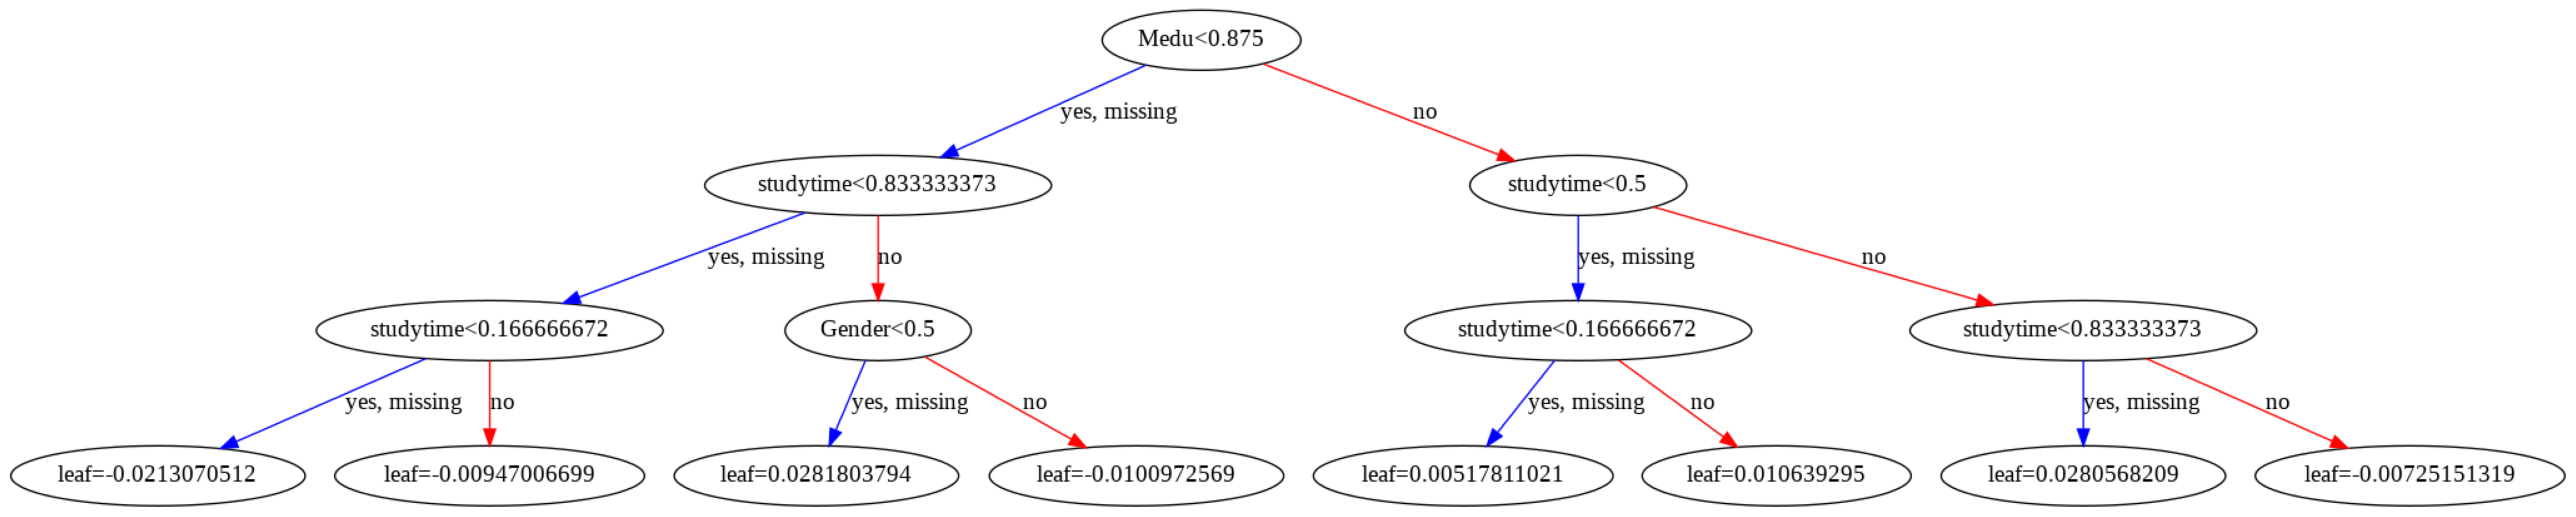

In [51]:
# XGBoost
# Visualize Boosting Trees
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

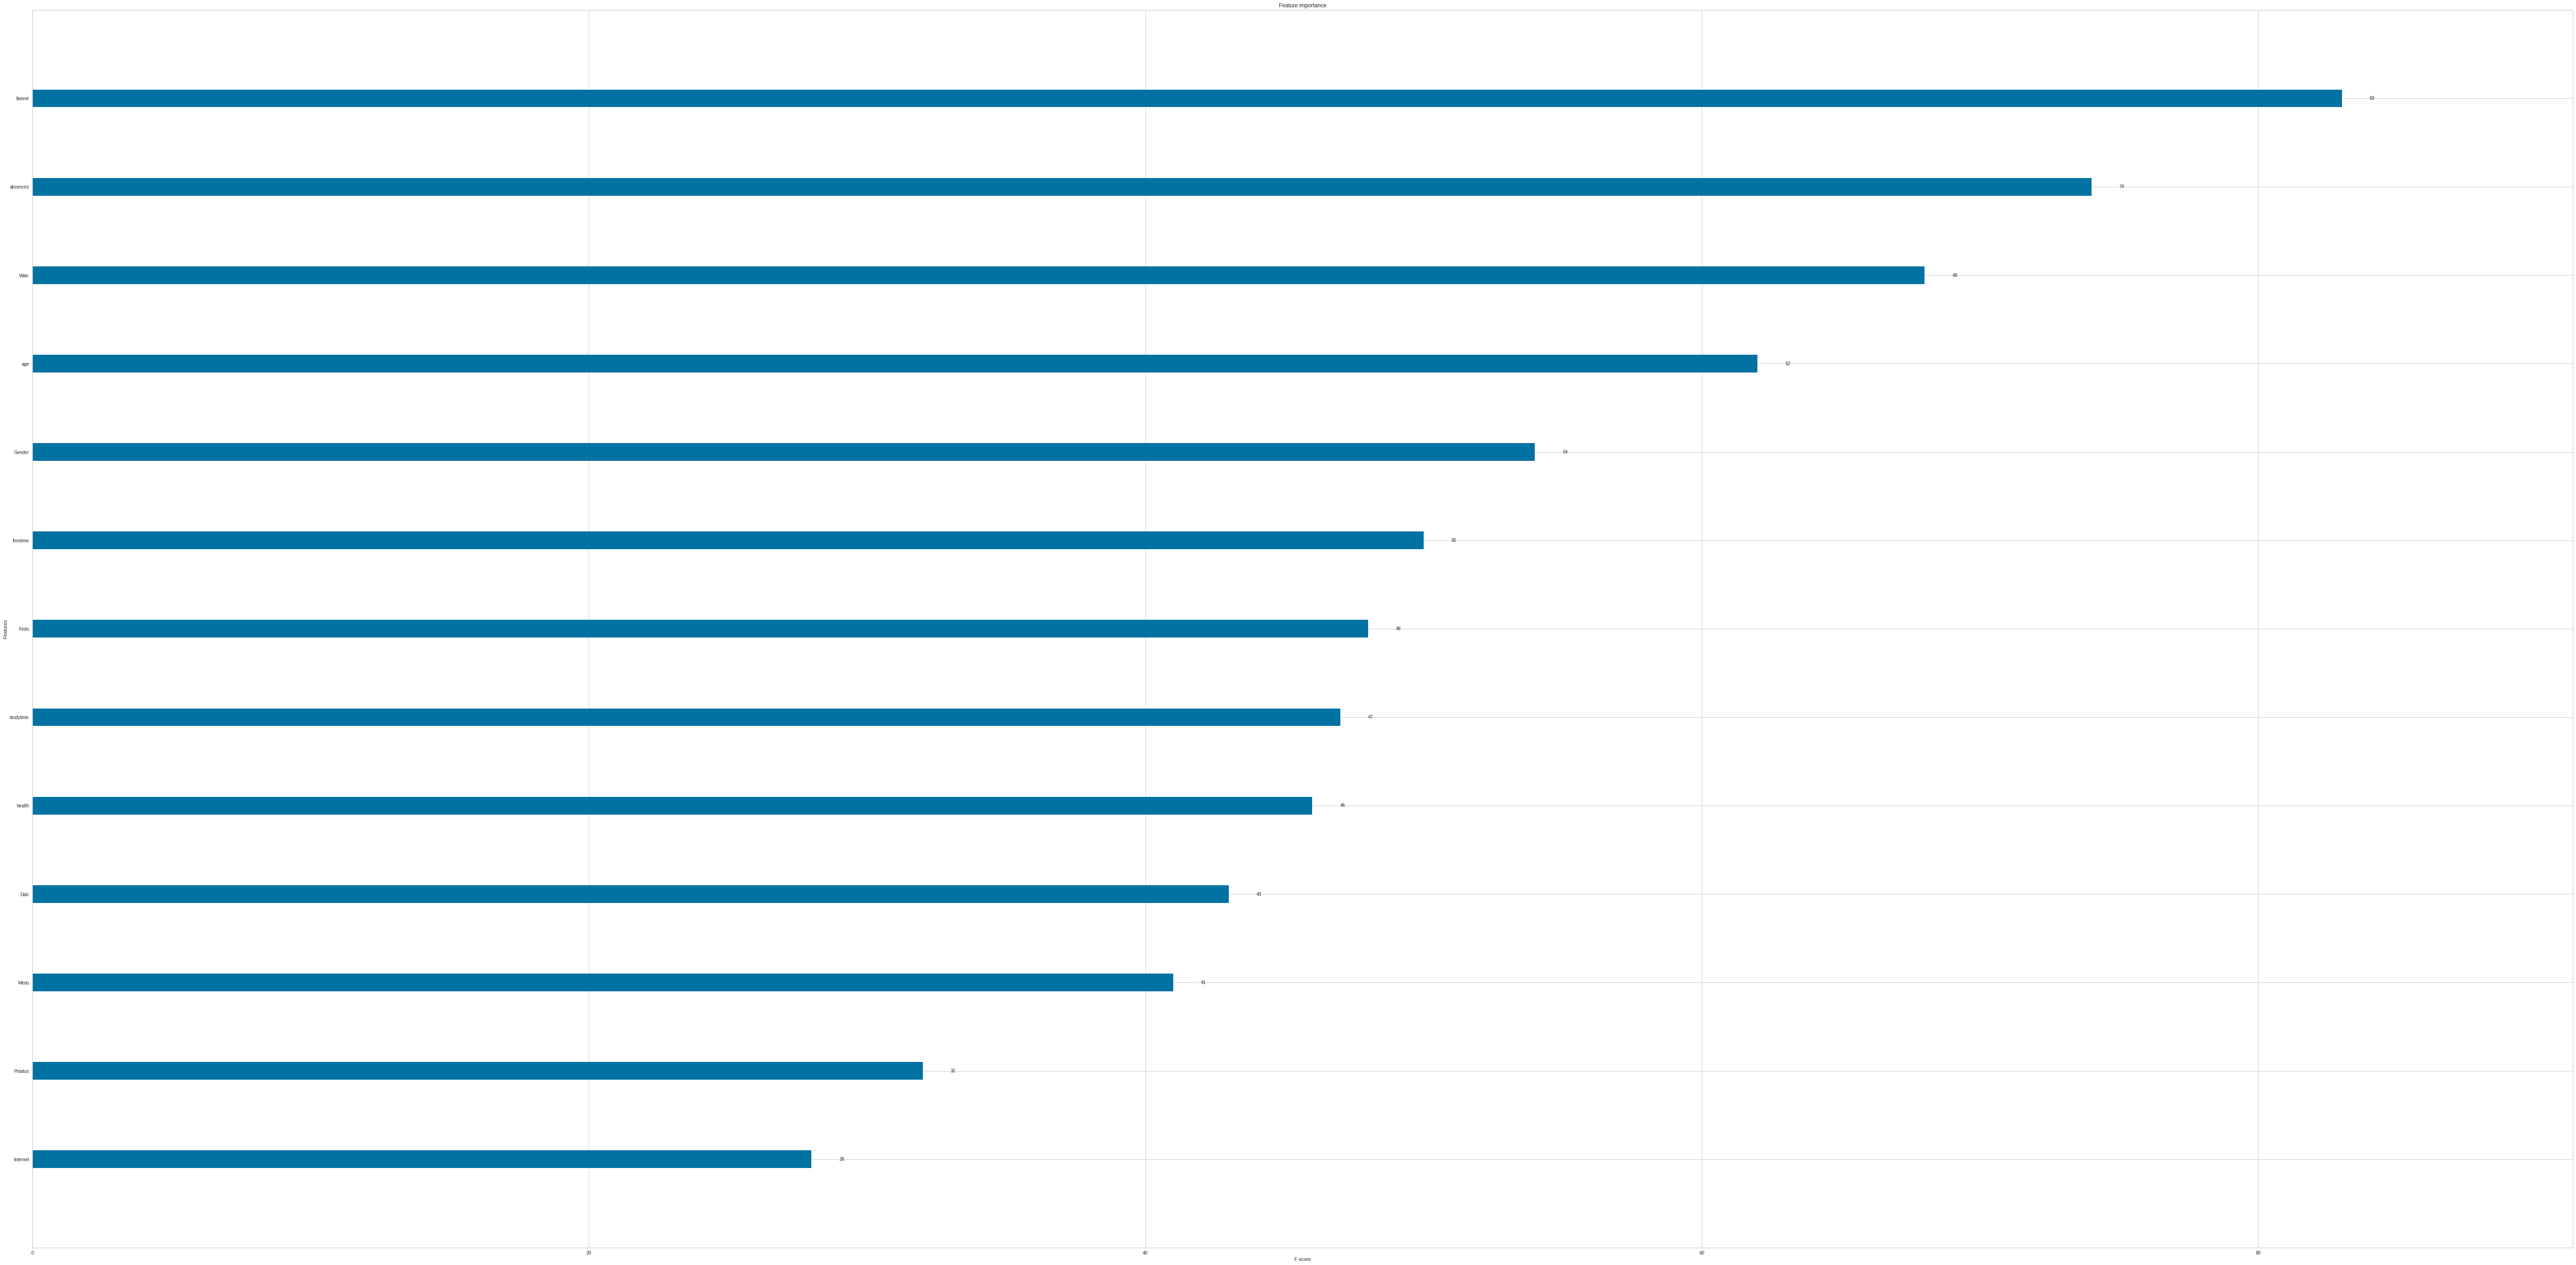

In [52]:
# Visualize Feature Importance
xgb.plot_importance(xg_reg)
plt.show()